## Introduction

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

blocks = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv',index_col=0)


## The Blocks Data

In [45]:
blocks.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


## The Census Data

The Census Data
There are quite a few fields in the census data. I've included a number of basic things like gender and racial breakdowns, income, commuting patterns, and occupation. Some of these are not given for tracts with small populations.

In [46]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


## Merging data with locations

To merge our census data with the location data, we'll first need to identify the census tracts associated with our locations. Here, I'll just use the data points in the census block file, but in general, we'll want to use the census block data as a lookup table.

To do this, we take our coordinates (i.e. the census block data) and perform a left join with the tract values as keys. Since the census data is only for New York City itself, we'll first filter out everything outside the city.

In [47]:
blocks = blocks[blocks.County.isin(['Bronx','Kings','New York','Queens','Richmond'])]
blocks['Tract'] = blocks.BlockCode // 10000
blocks = blocks.merge(census,how='left',right_index=True,left_on='Tract')

blocks.head()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
15,40.48,-74.232513,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
16,40.48,-74.229347,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
17,40.48,-74.226181,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
18,40.48,-74.223015,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
19,40.48,-74.219849,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [48]:
blocks.dropna(axis=1, how='all')
#blocks.head()
import numpy as np
blocks =blocks[blocks.TotalPop != 0]


In [49]:
blocks.head()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
755,40.493568,-74.251508,360850244020002,Richmond,NY,36085024402,Richmond,Staten Island,4241.0,2023.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
756,40.493568,-74.248342,360850244020002,Richmond,NY,36085024402,Richmond,Staten Island,4241.0,2023.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
757,40.493568,-74.245176,360850244020002,Richmond,NY,36085024402,Richmond,Staten Island,4241.0,2023.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
758,40.493568,-74.242010,360850244020002,Richmond,NY,36085024402,Richmond,Staten Island,4241.0,2023.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
759,40.493568,-74.238844,360850244020002,Richmond,NY,36085024402,Richmond,Staten Island,4241.0,2023.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3


In [50]:
blocks.info()
blocks.Income = pd.to_numeric(blocks.Income,errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 755 to 37111
Data columns (total 41 columns):
Latitude           13000 non-null float64
Longitude          13000 non-null float64
BlockCode          13000 non-null int64
County_x           13000 non-null object
State              13000 non-null object
Tract              13000 non-null int64
County_y           12999 non-null object
Borough            12999 non-null object
TotalPop           12999 non-null float64
Men                12999 non-null float64
Women              12999 non-null float64
Hispanic           12999 non-null float64
White              12999 non-null float64
Black              12999 non-null float64
Native             12999 non-null float64
Asian              12999 non-null float64
Citizen            12999 non-null float64
Income             11947 non-null float64
IncomeErr          11947 non-null float64
IncomePerCap       12838 non-null float64
IncomePerCapErr    12838 non-null float64
Poverty        

## Convert the spatial data to 2-D array

Here, we'll make a dense 2D array so that we can make plots of our spatial data. If you make a 2D array of the census tract numbers, you can copy some of the code in the for loop to look up the census tract for any point in constant time.

In [51]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

## Making Plots

Now that we can create dense 2D arrays, we'll want to make some plots. The imshow() function in Matplotlib is good for plotting this sort of data. Here is a function to make some simple plots with a colorbar.

In [52]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    
    plt.show()


## Racial demographics of New York City

Here are maps of the percentages of white, black, Hispanic, and Asian residents. We can clearly see the effects of different ethnic neighborhoods on the maps

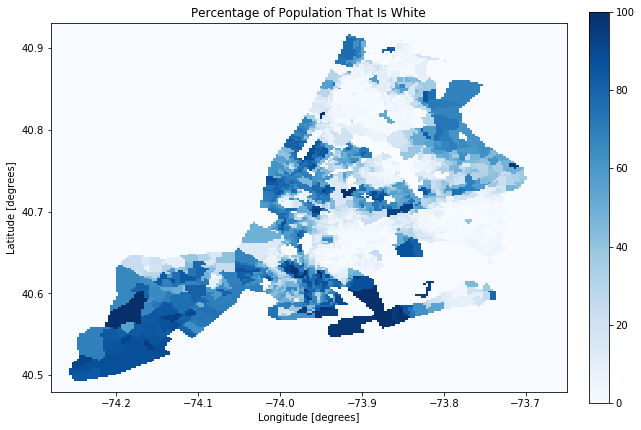

In [53]:
make_plot(blocks.White,colors='Blues',title='Percentage of Population That Is White')

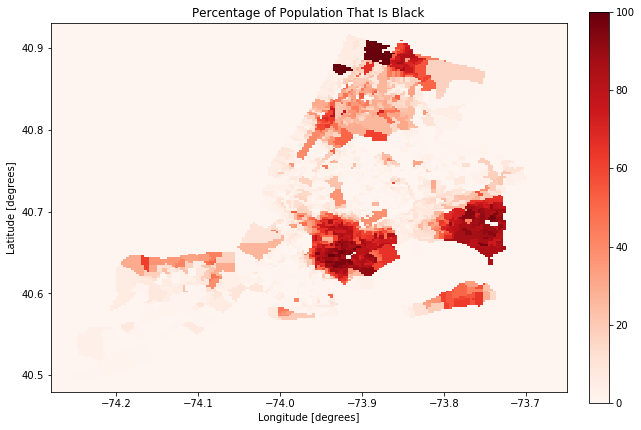

In [54]:
make_plot(blocks.Black,colors='Reds',title='Percentage of Population That Is Black')

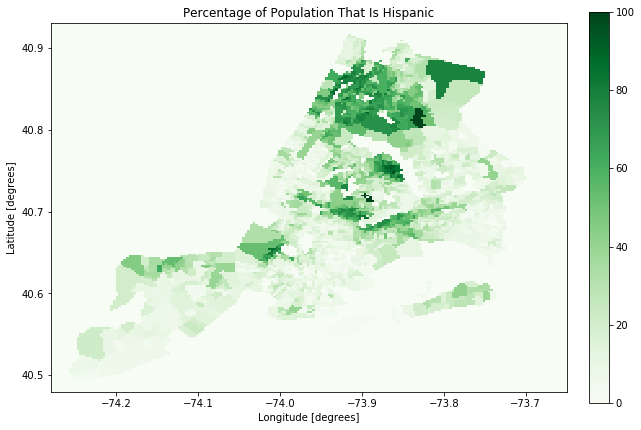

In [55]:
make_plot(blocks.Hispanic,colors='Greens',title='Percentage of Population That Is Hispanic')

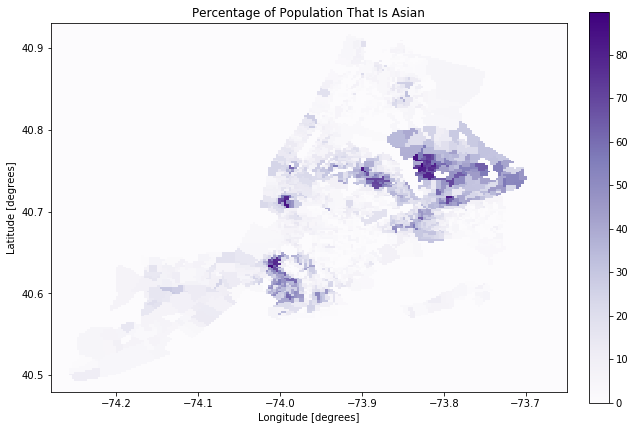

In [56]:
make_plot(blocks.Asian,colors='Purples',title='Percentage of Population That Is Asian')

## Income in New York City

Here is the median household income and the per capita income. As we'd generally expect, Manhattan below 125th St on the west side and 96th St on the east side is generally the wealthiest area. The central and southern parts of the Bronx seem to be the poorest.

The difference between Manhattan and the rest of the city increases in the per capita income map. This suggests that Manhattan households have fewer people than in the other boroughs.

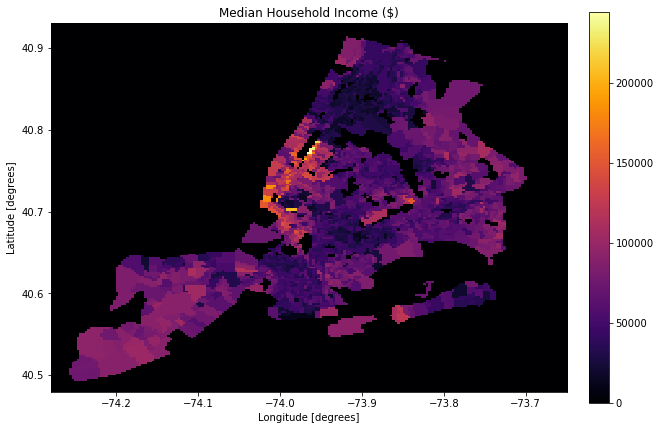

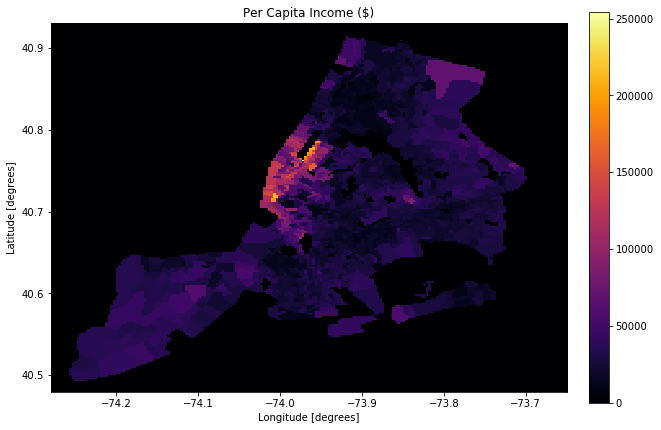

In [57]:
make_plot(blocks.Income,colors='inferno',title='Median Household Income ($)')
make_plot(blocks.IncomePerCap,colors='inferno',title='Per Capita Income ($)')

## Commuting Patterns

Looking at how people get to work, we see that people in eastern Queens, Staten Island, and the Rockaways are most likely to drive. Carpooling does not seem that popular anywhere. Public transit is very popular in most of the city.

Walkers seem to mostly live in or near the major business districts, but there are also some other hubs of walking commuters. I think many of these correspond to things like universities and hospitals.

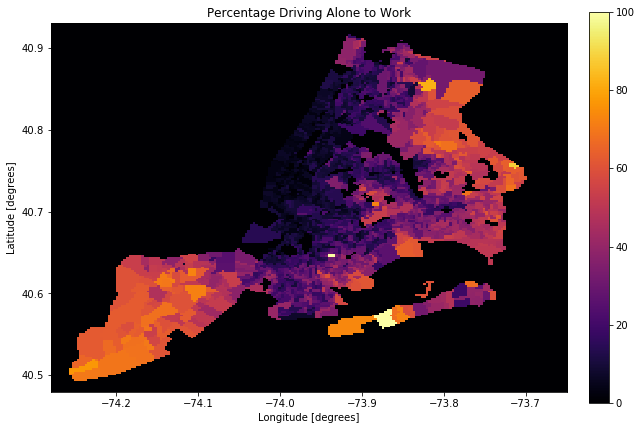

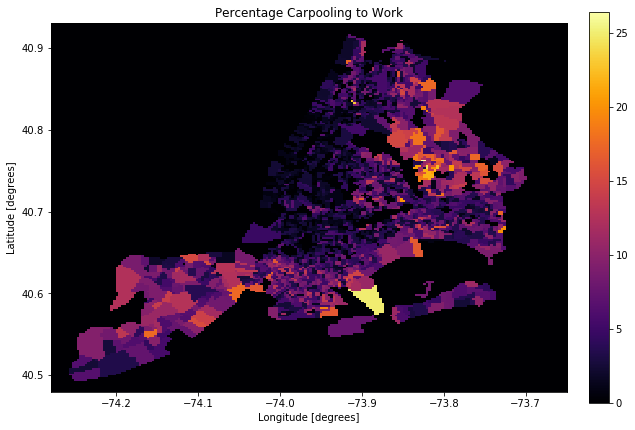

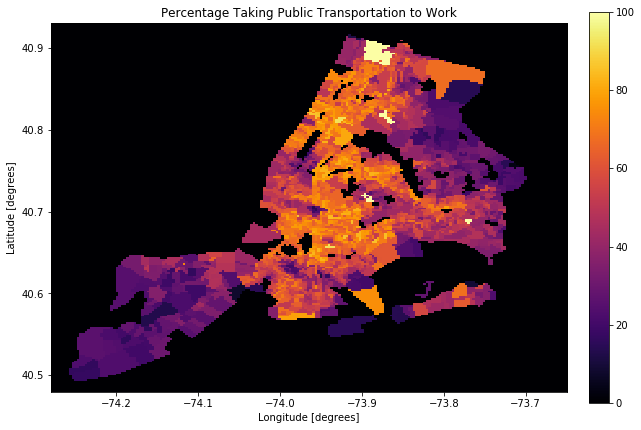

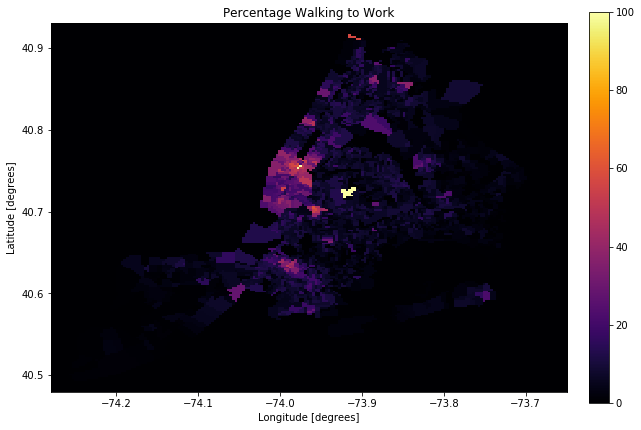

In [58]:
make_plot(blocks.Drive,colors='inferno',title='Percentage Driving Alone to Work')
make_plot(blocks.Carpool,colors='inferno',title='Percentage Carpooling to Work')
make_plot(blocks.Transit,colors='inferno',title='Percentage Taking Public Transportation to Work')
make_plot(blocks.Walk,colors='inferno',title='Percentage Walking to Work')

## What kinds of jobs to residents have?

People in Manhattan, Brooklyn from downtown to around Prospect Park, Riverdale, and a few parts of Queens are very likely to be in professional jobs. People everywhere else seem to mostly have working class jobs. This is particularly noticeable in places like the South Bronx and a large swath of the middle of Brooklyn.

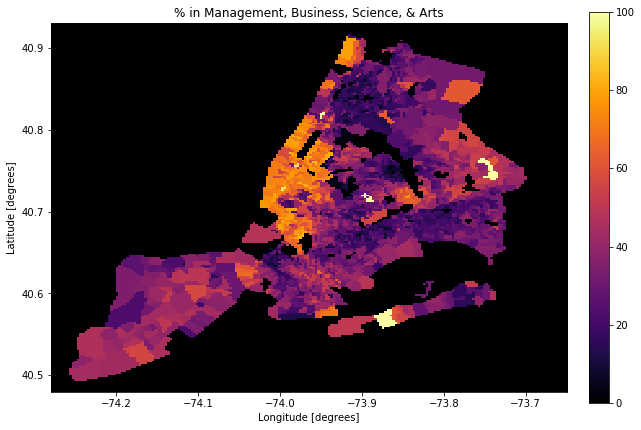

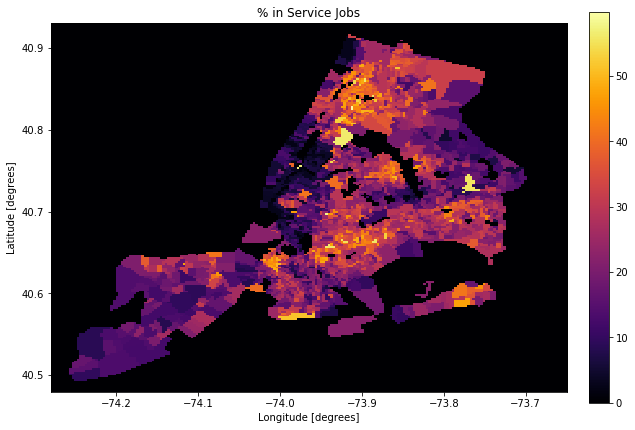

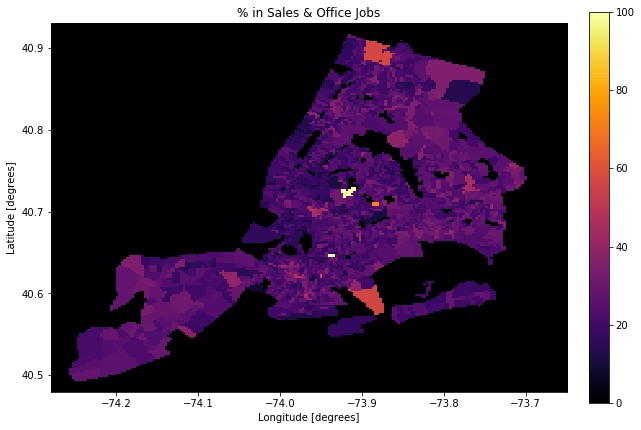

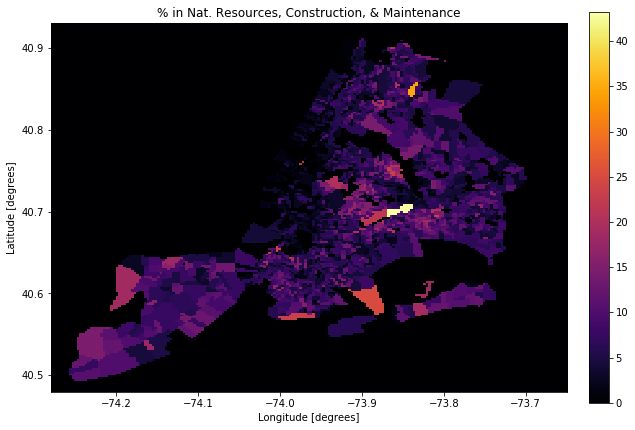

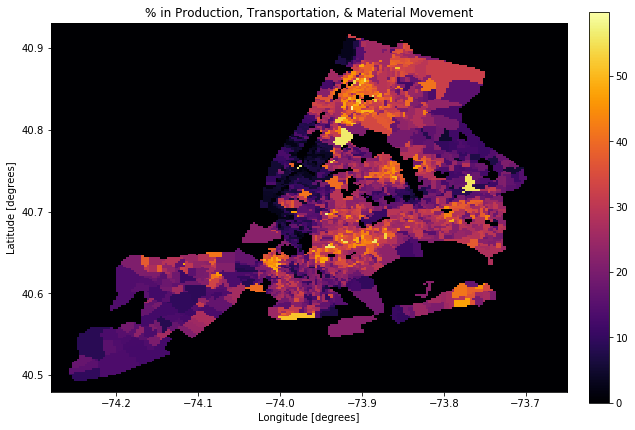

In [59]:
make_plot(blocks.Professional,colors='inferno',title='% in Management, Business, Science, & Arts')
make_plot(blocks.Service,colors='inferno',title='% in Service Jobs')
make_plot(blocks.Office,colors='inferno',title='% in Sales & Office Jobs')
make_plot(blocks.Construction,colors='inferno',title='% in Nat. Resources, Construction, & Maintenance')
make_plot(blocks.Service,colors='inferno',title='% in Production, Transportation, & Material Movement')

In [60]:
#blocks.to_csv("blocks.csv",encoding='utf-8')